# Fetching Dataset

In [25]:
from sklearn.datasets import fetch_openml

In [26]:
mnist = fetch_openml('mnist_784')           

In [27]:
# mnist                                     

In [62]:
x,y = mnist['data'], mnist['target']       

In [63]:
x                                      

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [65]:
x.shape          

(70000, 784)

In [66]:
y.shape

(70000,)

In [67]:
%matplotlib inline

In [68]:
import matplotlib
import matplotlib.pyplot as plt

In [111]:
some_digit = x.iloc[36000].to_numpy()           
some_digit_img = some_digit.reshape(28,28)       


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

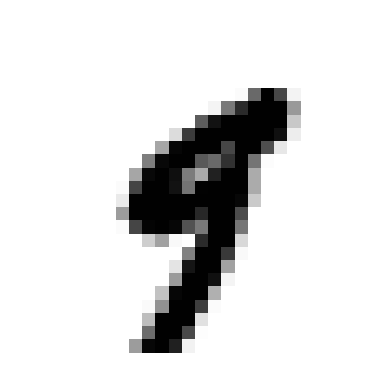

In [112]:
plt.imshow(some_digit_img , cmap = 'binary' )
plt.axis('off')

In [113]:
y[36000]

'9'

# Train - Test spliting

In [114]:
x_train , x_test = x[:60000] , x[60000:]         

In [115]:
x_train.shape , x_test.shape

((60000, 784), (10000, 784))

In [116]:
y_train , y_test = y[:60000] , y[60000:]           

In [117]:
import numpy as np
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train.iloc[shuffle_index], y_train.iloc[shuffle_index]              

# Creating a '9' detector

In [186]:
y_train = y_train.astype(np.int8)        
y_test = y_test.astype(np.int8)
y_train_9 = (y_train == 9)              
y_test_9 = (y_test == 9)

In [153]:
y_train

13550    2
57041    0
20724    0
17507    2
9621     3
        ..
14207    4
1924     3
31462    2
24109    4
10761    9
Name: class, Length: 60000, dtype: int8

In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

clf = LogisticRegression(tol=0.1)                   

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(some_digit.reshape(1, -1))

# Fit model with scaled data

clf.fit(X_train_scaled, y_train_9)

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


LogisticRegression(tol=0.1)

- predictions dekhte hai

In [184]:
clf.predict([some_digit])    

array([ True])

# Cross validation

In [191]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, x_train, y_train_9, cv = 3 , scoring = 'accuracy')

In [193]:
a.mean() 

np.float64(0.95965)